In [2]:
%pylab inline
import pandas as pd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [49]:
# Load scores
scores_50kb = pd.read_csv("~/workspace/panct/precomputed-scores/hprc-v1.1-mc-grch38_complexity_50000.tab.gz", sep="\t")
scores_100kb = pd.read_csv("~/workspace/panct/precomputed-scores/hprc-v1.1-mc-grch38_complexity_100000.tab.gz", sep="\t")
scores_1Mb = pd.read_csv("~/workspace/panct/precomputed-scores/hprc-v1.1-mc-grch38_complexity_1000000.tab.gz", sep="\t")

# Filter scores
#def FilterScores(df):
#    df = df[(df["numwalks"]>0) & (df["numwalks"]<100)]
#    return df
#scores_50kb = FilterScores(scores_50kb)
#scores_100kb = FilterScores(scores_100kb)
#scores_1Mbkb = FilterScores(scores_1Mb)

In [50]:
scores_50kb.sort_values(["sequniq-normnode"], ascending=False)

,chrom,start,end,numnodes,total_length,numwalks,sequniq-normwalk,sequniq-normnode
18533,chr5,46900000,46950000,159287,404147,7,0.681924,20609.224463
18535,chr5,47000000,47050000,107967,272043,8,0.694385,13839.587145
18532,chr5,46850000,46900000,122858,293958,10,0.787911,13221.731390
18536,chr5,47050000,47100000,128553,257867,19,0.867636,10213.263157
18534,chr5,46950000,47000000,148517,344308,17,0.860729,10168.057229
...,...,...,...,...,...,...,...,...
61094,chr21,12700000,12750000,50,51200,0,NaN,NaN
61095,chr21,12750000,12800000,50,51200,0,NaN,NaN
61096,chr21,12800000,12850000,50,51200,0,NaN,NaN
61097,chr21,12850000,12900000,50,51200,0,NaN,NaN


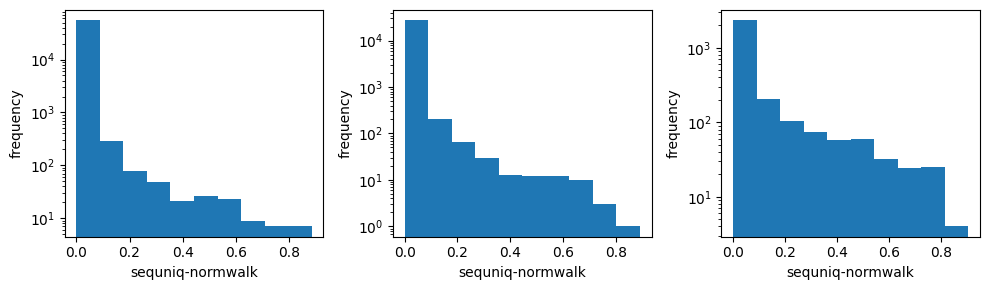

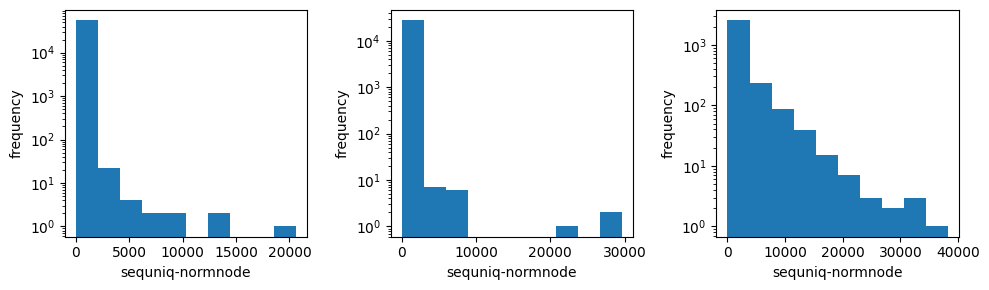

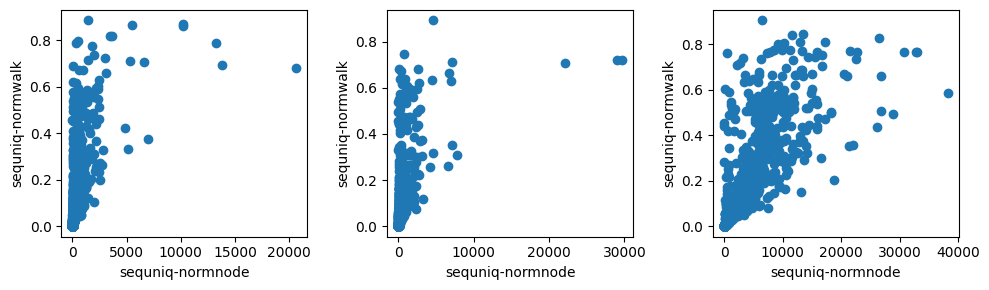

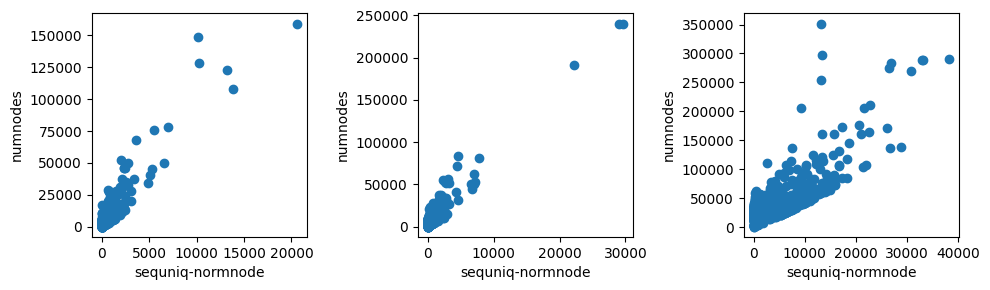

In [44]:
# Histograms of precomputed scores for different bin sizes
fig = plt.figure()
fig.set_size_inches((10, 3))
pltnum = 1
for df in [scores_50kb, scores_100kb, scores_1Mb]:
    ax = fig.add_subplot(1, 3, pltnum)
    ax.hist(df["sequniq-normwalk"])
    ax.set_xlabel("sequniq-normwalk")
    ax.set_ylabel("frequency")
    ax.set_yscale("log")
    pltnum += 1
fig.tight_layout()

fig = plt.figure()
fig.set_size_inches((10, 3))
pltnum = 1
for df in [scores_50kb, scores_100kb, scores_1Mb]:
    ax = fig.add_subplot(1, 3, pltnum)
    ax.hist(df["sequniq-normnode"])
    ax.set_xlabel("sequniq-normnode")
    ax.set_ylabel("frequency")
    ax.set_yscale("log")
    pltnum += 1
fig.tight_layout()

fig = plt.figure()
fig.set_size_inches((10, 3))
pltnum = 1
for df in [scores_50kb, scores_100kb, scores_1Mb]:
    ax = fig.add_subplot(1, 3, pltnum)
    ax.scatter(df["sequniq-normnode"], df["sequniq-normwalk"])
    ax.set_xlabel("sequniq-normnode")
    ax.set_ylabel("sequniq-normwalk")
    pltnum += 1
fig.tight_layout()

fig = plt.figure()
fig.set_size_inches((10, 3))
pltnum = 1
for df in [scores_50kb, scores_100kb, scores_1Mb]:
    ax = fig.add_subplot(1, 3, pltnum)
    ax.scatter(df["sequniq-normnode"], df["numnodes"])
    ax.set_xlabel("sequniq-normnode")
    ax.set_ylabel("numnodes")
    pltnum += 1
fig.tight_layout()

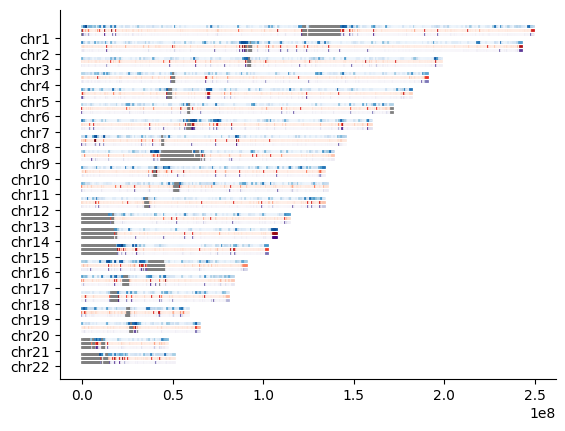

In [78]:
# Karyograms of scores
import matplotlib.cm as cm
import numpy as np

def PlotSegment(x, chrom, ax, cmap=None, offset=0):
    if cmap is None:
        cmap = cm.Purples
    yval = 23-int(chrom[3:])+offset
    if x["numwalks"]==0:
        color = "gray"
    else:
        color = cmap(np.sqrt(x["sequniq-normwalk"]))
    ax.plot([x["start"], x["end"]], [yval, yval], linewidth=2, color=color)
    return None
    
def PlotKaryogramChrom(df, chrom, ax=None, cmap=None, offset=0):
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    pltdf = df[df["chrom"]==chrom]
    pltdf.apply(lambda x: PlotSegment(x, chrom, ax, cmap=cmap, offset=offset), 1)

fig = plt.figure()
ax = fig.add_subplot(111)
labels = ["50kb", "100kb", "1Mb"]
cmaps = [cm.Purples, cm.Reds, cm.Blues]
pltnum = 1
for df in [scores_50kb, scores_100kb, scores_1Mb]:
    for chrom in range(1, 23):
        PlotKaryogramChrom(df, "chr%s"%chrom, ax=ax, offset=pltnum*0.25, cmap=cmaps[pltnum-1])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_yticks(range(1, 23))
    ax.set_yticklabels(["chr%s"%chrom for chrom in list(range(1,23))[::-1]]);
    pltnum += 1
#ax.axvline(160531482)
fig.savefig("complexity_scores_karyogram.png");

In [ ]:
# chr14	106800000	106900000 - > IGH -> 0.96
# chr5	93900000	94000000 -> 0.000431
# chr5	70900000	71000000 -> SMN1 0.86

#df = scores_100kb
#df.sort_values("sequniq-normwalk", ascending=False) #[(df["chrom"]=="chr5") & (df["start"]>5e7)]
#df[(df["chrom"]=="chr6") & (df["start"]>160531482)]#.sort_values("sequniq-normwalk", ascending=False) #[(df["chrom"]=="chr5") & (df["start"]>5e7)]

# GWAAS scores

In [85]:
#!head ../gwas/fromTSCC/Clumped_PASS_AccumbensVol_Satizabal2019_500000.bed

In [86]:
%%bash
for f in $(ls ../gwas/fromTSCC/*.bed)
do
	echo $f
	trait=$(basename $f .bed)
	./liftOver -bedPlus=3 ${f} hg19ToHg38.over.chain.gz hg38/${trait}.bed unMapped
done

../gwas/fromTSCC/Clumped_PASS_AccumbensVol_Satizabal2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_AD_Zhao2021_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_ADHD_Demontis2018_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_AdultOnsetAsthma_Ferreira2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_AgeFirstBirth_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_AgeOfInitiation_Liu2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Aging_Timmers2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Alzheimer_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Alzheimers_deRojas2021_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Alzheimers_Jansen2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_AlzheimersMaternal_Marioni2018_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_AlzheimersPaternal_Marioni2018_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_AlzheimersProxy_Marioni2018_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_AmygdalaVol_Satizabal2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_AnorexiaNervosa_Duncan_2017_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_AnorexiaNervosa_Duncan2017_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_AnorexiaNervosa_Watson2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_AtrialFibrillation_Low2017_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_AtrialFibrillation_Nielsen2018_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Autism_Grove2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Baso_Kanai2018_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Baso_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_BasoP_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_BDSCZ_Ruderfer2018_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_BIP_Mullins2021_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_BIP_Stahl2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Bipolar_Disorder_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_BipolarDisorder_Ruderfer2018_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_BMI_Akiyama2017_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_BMI1_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Bone_Mineral_Density_Kemp_2017_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_BrainstemVol_Satizabal2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_BreastCancer_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_BS_Kanai_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_CardioembolicStroke_Malik2018_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_CaudateVol_Satizabal2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_CD_deLange2017_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Celiac_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_ChildOnsetAsthma_Ferreira2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_CigarettesPerDay_Liu2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_ColorectalCancer_Tanikawa_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Coronary_Artery_Disease_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Coronary_Artery_Disease_Howson_2017_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_CoronaryArteryDisease_Howson2017_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Crohns_Disease_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_DBP_Kanai2018_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_DepressedAffect_Nagel2018_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Depression_Nagel2018_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_DrinksPerWeek_Liu2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_DS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_EGFR_Kanai2018_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_ENIGMA2_MeanPutamen_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Eosino_Kanai2018_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Eosino_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_EosinoP_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Epilepsy_Anney_2014_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Epilepsy_Anney2014_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_FA_Zhao2021_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_FastingGlucose_Manning_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_FetalBirthWeight_Warrington2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_FEV1_Shrine2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_FEV1FVC_Shrine2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_FVC_Shrine2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_GeneralRiskTolerance_KarlssonLinner2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Glaucoma_Craig2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Hb_Kanai2018_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_HbA1C_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_HbA1c_Kanai2018_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_HCT_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_HDL_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_HDL_Kanai2018_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Height_Kanai2018_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Height1_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_HGB_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_HipKneeOA_Tachmazidou2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_HipOA_Tachmazidou2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_HLR_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_HLRP_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Ht_Kanai2018_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_IBD_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_IBD_deLange2017_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Insomnia_Jansen2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Intelligence_SavageJansen2018_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_IRF_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_IschemicStroke_Malik2018_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_KidneyVol_Liu2021_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_KneeOA_Tachmazidou2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_LargeArteryStroke_Malik2018_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_LDL_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_LDL_Kanai2018_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_LiverFat_Liu2021_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_LiverIron_Liu2021_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_LiverVol_Liu2021_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_LongSleepDuration_Dashti2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_LungVol_Liu2021_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Lupus_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Lym_Kanai2018_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Lym_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_LymP_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_MaternalBirthWeight_Warrington2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_MCH_Kanai2018_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_MCH_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_MCHC_Kanai2018_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_MCHC_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_MCPfemale_Johnston2021_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_MCPmale_Johnston2021_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_MCV_Kanai2018_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_MCV_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_MD_Zhao2021_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_MDD_CONVERGE2015_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_MDD_Howard2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_MDD_Wray2018_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_MedicationUse_Wu2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Menarche_Horikoshi2018_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Menarche2017_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Menopause_Horikoshi2018_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_MO_Zhao2021_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Mono_Kanai2018_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Mono_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_MonoP_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_MPV_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_MRV_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_MSCV_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Multiple_sclerosis_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Multiple_Sclerosis_IMSGC2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Myopia_Hysi2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Neuroticism_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Neuroticism_Nagel2018_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Neutro_Kanai2018_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Neutro_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_NeutroP_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_OA_Tachmazidou2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_OvarianCancer_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_PallidumVol_Satizabal2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_PancreasFat_Liu2021_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_PancreasIron_Liu2021_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_PancreasVol_Liu2021_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Parkinsons_23andMe_Corces2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Parkinsons23andMe_Corces2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_PCT_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_PDW_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_PEF_Shrine2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Plt_Kanai2018_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Plt_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_POAG_Shiga2018_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Primary_biliary_cirrhosis_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_ProstateCancer_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_PutamenVol_Satizabal2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_RA_Okada2013_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_RBC_Kanai2018_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_RBC_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_RD_Zhao2021_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_RDWCV_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_ReactionTime_Davies2018_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Rheumatoid_Arthritis_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_RTC_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_RTCP_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_SA_Grasby2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_SBP_Kanai2018_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Schizophrenia_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Schizophrenia_Lam2019_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Schizophrenia_Pardinas2018_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Schizophrenia_Ruderfer2018_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_SCZvsBD_Ruderfer2018_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_ShortSleepDuration_Dashti2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_SleepDuration_Dashti2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_SmokingCessation_Liu2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_SmokingInitiation_Liu2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_SpleenVol_Liu2021_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_SubAdiposeVol_Liu2021_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_SWB_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_T2D_Suzuki_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_TC_Kanai_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_TG_Kanai2018_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_TH_Grasby2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_ThalamusVol_Satizabal2019_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Triglycerides_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Type_1_Diabetes_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Type_1_Diabetes_Chiou2021_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Type_2_Diabetes_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_UC_deLange2017_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Ulcerative_Colitis_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_VerbalNumericReasoning_Davies2018_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_ViscAdiposeVol_Liu2021_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_WBC_Kanai2018_EAS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_WBC_Vuckovic2020_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Worry_Nagel2018_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Years_of_Education1_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_PASS_Years_of_Education2_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_AlanineAminotransferase_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_Albumin_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_AlkalinePhosphatase_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_ApolipoproteinA_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_ApolipoproteinB_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_AspartateAminotransferase_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_Calcium_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_Cholesterol_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_CreactiveProtein_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_Creatinine_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_CystatinC_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_DirectBilirubin_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_GammaGlutamyltransferase_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_Glucose_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_HbA1c_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_HDLcholesterol_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_IGF1_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_LDLdirect_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_LipoproteinA_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_Phosphate_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_SHBG_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_Testosterone_Male_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_TotalBilirubin_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_TotalProtein_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_Triglycerides_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_Urate_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_Urea_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.biochemistry_VitaminD_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.blood_EOSINOPHIL_COUNT_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.blood_HIGH_LIGHT_SCATTER_RETICULOCYTE_COUNT_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.blood_LYMPHOCYTE_COUNT_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.blood_MEAN_CORPUSCULAR_HEMOGLOBIN_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.blood_MEAN_PLATELET_VOL_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.blood_MEAN_SPHERED_CELL_VOL_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.blood_MONOCYTE_COUNT_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.blood_PLATELET_COUNT_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.blood_PLATELET_DISTRIB_WIDTH_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.blood_RBC_DISTRIB_WIDTH_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.blood_RED_COUNT_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.blood_WHITE_COUNT_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.bmd_HEEL_TSCOREz_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.body_BALDING1_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.body_BALDING4_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.body_BMIz_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.body_HEIGHTz_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.body_LEFT_HANDED_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.body_WHRadjBMIz_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.bp_DIASTOLICadjMEDz_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.bp_SYSTOLICadjMEDz_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.cancer_ALL_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.cancer_BREAST_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.cancer_MELANOMA_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.cancer_PROSTATE_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.cov_EDU_COLLEGE_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.cov_EDU_YEARS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.cov_SMOKING_STATUS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.disease_AID_ALL_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.disease_AID_SURE_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.disease_ALLERGY_ECZEMA_DIAGNOSED_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.disease_ASTHMA_DIAGNOSED_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.disease_CARDIOVASCULAR_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.disease_DERMATOLOGY_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.disease_DIABETES_ANY_DIAGNOSED_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.disease_ENDOCRINE_DIABETES_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.disease_HI_CHOL_SELF_REP_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.disease_HYPERTENSION_DIAGNOSED_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.disease_HYPOTHYROIDISM_SELF_REP_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.disease_PSORIASIS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.disease_RA_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.disease_RESPIRATORY_ENT_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.disease_T2D_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.disease_THYROID_ANY_SELF_REP_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.impedance_BASAL_METABOLIC_RATEz_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.lung_FEV1FVCzSMOKE_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.lung_FVCzSMOKE_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.mental_NEUROTICISM_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.other_MORNINGPERSON_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.pigment_HAIR_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.pigment_HAIR_blackmale_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.pigment_HAIR_blonde_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.pigment_HAIR_darkbrown_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.pigment_HAIR_red_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.pigment_SKIN_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.pigment_SUNBURN_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.pigment_TANNING_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.repro_AgeFirstBirth_Female_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.repro_MENARCHE_AGE_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.repro_MENOPAUSE_AGE_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.repro_NumberChildrenEverBorn_Female_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.repro_NumberChildrenEverBorn_Male_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB_460K.repro_NumberChildrenEverBorn_Pooled_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.blood_EOSINOPHIL_COUNT_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.blood_HIGH_LIGHT_SCATTER_RETICULOCYTE_COUNT_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.blood_LYMPHOCYTE_COUNT_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.blood_MEAN_CORPUSCULAR_HEMOGLOBIN_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.blood_MEAN_PLATELET_VOL_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.blood_MEAN_SPHERED_CELL_VOL_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.blood_MONOCYTE_COUNT_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.blood_PLATELET_COUNT_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.blood_PLATELET_DISTRIB_WIDTH_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.blood_RBC_DISTRIB_WIDTH_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.blood_RED_COUNT_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.blood_WHITE_COUNT_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.bmd_HEEL_TSCOREz_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.body_BALDING1_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.body_BALDING4_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.body_BMIz_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.body_HEIGHTz_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.body_WHRadjBMIz_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.bp_DIASTOLICadjMEDz_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.bp_SYSTOLICadjMEDz_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.cov_EDU_COLLEGE_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.cov_EDU_YEARS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.cov_SMOKING_STATUS_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.disease_AID_ALL_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.disease_ALLERGY_ECZEMA_DIAGNOSED_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.disease_ASTHMA_DIAGNOSED_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.disease_CARDIOVASCULAR_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.disease_DIABETES_ANY_DIAGNOSED_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.disease_ENDOCRINE_DIABETES_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.disease_HI_CHOL_SELF_REP_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.disease_HYPERTENSION_DIAGNOSED_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.disease_HYPOTHYROIDISM_SELF_REP_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.disease_RESPIRATORY_ENT_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.disease_T2D_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.disease_THYROID_ANY_SELF_REP_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.impedance_BASAL_METABOLIC_RATEz_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.lung_FEV1FVCzSMOKE_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.lung_FVCzSMOKE_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.mental_NEUROTICISM_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.other_MORNINGPERSON_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.pigment_HAIR_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.pigment_HAIR_blonde_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.pigment_SKIN_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.pigment_SUNBURN_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.pigment_TANNING_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.repro_MENARCHE_AGE_500000.bed


Reading liftover chains
Mapping coordinates


../gwas/fromTSCC/Clumped_UKB2_145K.repro_MENOPAUSE_AGE_500000.bed


Reading liftover chains
Mapping coordinates
